## Analysing Westbound Traffic on the I-94 Interstate highway

### 1. Intro, importing and initial examination of the data

This dataset is available at:
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

Aim:           
The aim is to determine indicators of heavy traffic on the I-94.
This could include:          
    - weather type        
    - time of day          
    - time of week         


In [1]:
import pandas as pd

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


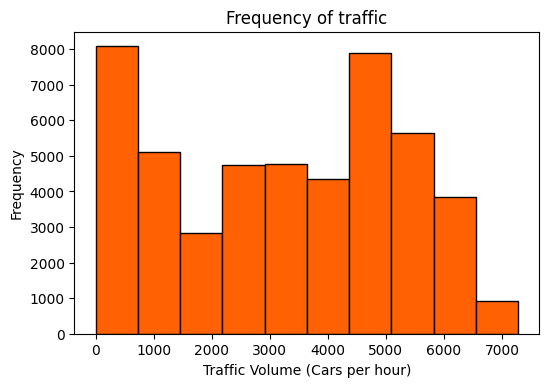

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist(color='#FF6103', edgecolor='black')
plt.xlabel('Traffic Volume (Cars per hour)')
plt.title('Frequency of traffic')
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

For every hour, there was a minimum value of 0 cars passing the recording station and a maximium of 7280 cars.         
The average number of cars passing the station was 3259 cars per hour.           
25% of the time there were 1193 cars passing and 75% of the time there were 4933 cars passing.         

### 2. A statistical compaarison of the daytime vs nighttime

First to format the date column so that we can use the times

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [9]:
# To make the list of unique hours
hours = traffic['date_time'].dt.hour.unique()
hours

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

In [10]:
# To make the new hours list. Not needed but nice to see. Perhaps we use this later
day_hours = []
night_hours = []

for hour in hours:
    if (hour >= 6) & (hour < 19):
        day_hours.append(hour)
    else:
        night_hours.append(hour)
        
day_hours

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 6, 8, 7]

In [11]:
# To make the new lists that split the data
daytime_list = []
nighttime_list = []

In [12]:
daytime_list = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
nighttime_list = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

daytime_list

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [13]:
nighttime_list

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [14]:
daytime_list.describe().round()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.0,23877.0,23877.0,23877.0,23877.0
mean,282.0,1.0,0.0,53.0,4762.0
std,13.0,64.0,0.0,38.0,1175.0
min,0.0,0.0,0.0,0.0,0.0
25%,273.0,0.0,0.0,5.0,4252.0
50%,284.0,0.0,0.0,75.0,4820.0
75%,293.0,0.0,0.0,90.0,5559.0
max,310.0,9831.0,1.0,100.0,7280.0


In [15]:
nighttime_list.describe().round()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.0,24327.0,24327.0,24327.0,24327.0
mean,280.0,0.0,0.0,46.0,1785.0
std,13.0,1.0,0.0,40.0,1442.0
min,0.0,0.0,0.0,0.0,0.0
25%,272.0,0.0,0.0,1.0,530.0
50%,281.0,0.0,0.0,40.0,1287.0
75%,291.0,0.0,0.0,90.0,2819.0
max,308.0,56.0,1.0,100.0,6386.0


### Summary of daytime vs nighttime:


Graphing the day and night traffic

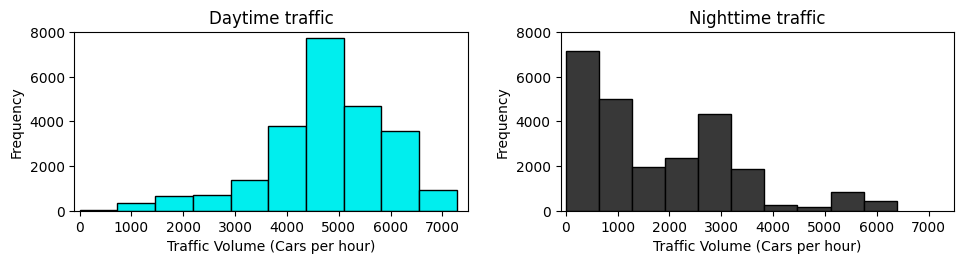

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
daytime_list['traffic_volume'].plot.hist(color='#00EEEE', edgecolor='black')
plt.xlim([-100, 7500])
plt.xlabel('Traffic Volume (Cars per hour)')
plt.ylim([0, 8000])
plt.title('Daytime traffic')
#plt.ylim([0,25])
plt.plot()

plt.subplot(1, 2, 2)
nighttime_list['traffic_volume'].plot.hist(color='#383838', edgecolor='black')
plt.xlim([-100, 7500])
plt.xlabel('Traffic Volume (Cars per hour)')
plt.ylim([0, 8000])
plt.title('Nighttime traffic')
#plt.ylim([0,25])
plt.plot()

plt.tight_layout(pad=2)

In [17]:
daytime_list.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [18]:
nighttime_list.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


Note: There is a number of rows missing from the nighttime dataset.           
The daytime traffic is skewed to the left indicating that there are usually more car traffic volumne per hour.           The nighttime traffic is skewed more to the right indicating that there are generally less cars per hour and that the traffic loads are more spread out.   

### 3. Examining Months, Days of the week & Time of day with line plots

### Months

In [19]:
daytime_list['month'] = daytime_list['date_time'].dt.month
by_month = daytime_list.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-19-346ebd0e854c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

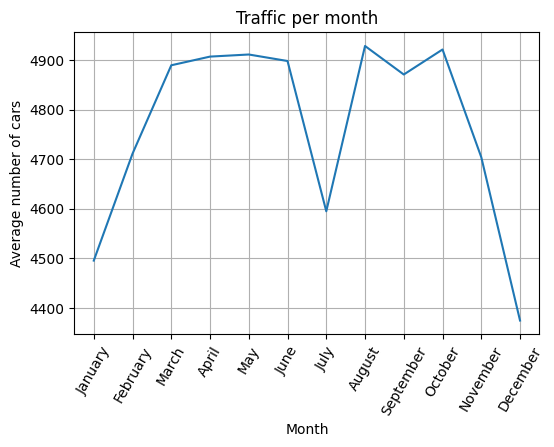

In [20]:
plt.plot(by_month['traffic_volume'])
plt.xlim([0.5, 12.5])
plt.xlabel('Month')
plt.ylabel('Average number of cars')
plt.title('Traffic per month')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=60)
plt.grid()
plt.show()

There appears to be still high averages for each month of the year ranging between approximately 4400 and 4900. There are dips however in January, July and December that could align with holidays.

### Days of the week

In [21]:
daytime_list['dayofweek'] = daytime_list['date_time'].dt.dayofweek
by_dayofweek = daytime_list.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-21-50f44220f8d9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

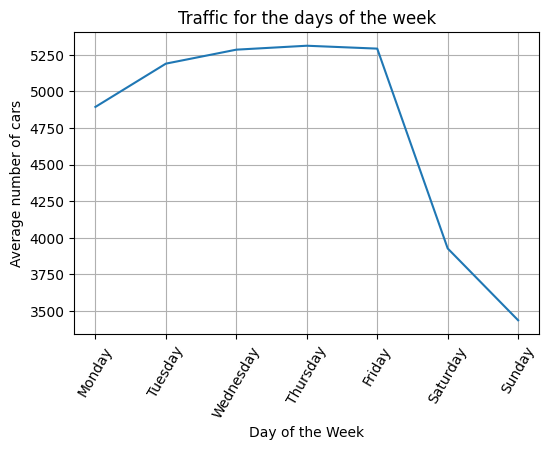

In [22]:
plt.plot(by_dayofweek['traffic_volume'])
#plt.xlim([0.5, 12.5])
plt.xlabel('Day of the Week')
plt.ylabel('Average number of cars')
plt.title('Traffic for the days of the week')
plt.xticks([0, 1, 2, 3, 4, 5, 6,], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=60)
plt.grid()
plt.show()

It appears that traffic volumnes do drop on the weekend from around 5000 to less than 4000

### Hours

In [23]:
daytime_list['hour'] = daytime_list['date_time'].dt.hour
bussiness_days = daytime_list.copy()[daytime_list['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_list.copy()[daytime_list['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

<ipython-input-23-4ba47f90bccd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


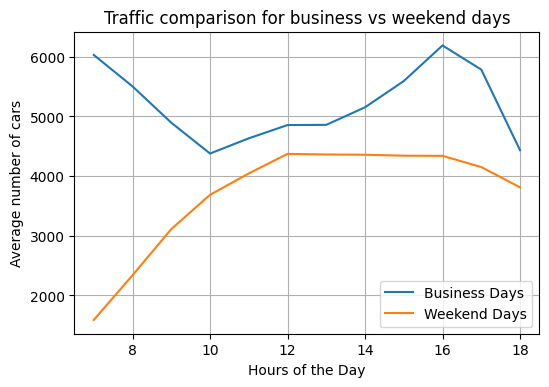

In [24]:
plt.plot(by_hour_business['traffic_volume'])
plt.xlim([6.5, 18.5])
plt.xlabel('Hours of the Day')
plt.ylabel('Average number of cars')
plt.title('Traffic comparison for business vs weekend days')

plt.plot(by_hour_weekend['traffic_volume'],)
#plt.xticks([0, 1, 2, 3, 4, 5, 6,], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=60)


plt.legend(["Business Days", "Weekend Days"], loc ="lower right")
plt.grid()
plt.show()

For the business days, there are high traffic loads early in the morning at 7am and then again at 4 or 5 pm indicating that people are either on the road going to work or that they are coming home from work. This is different to the weekend where traffic only rises in the morning until midday indicating that people may be sleeping in.

### 4. Examining the impact of weather

Weather conditions may also be used as indicators for the traffic volumes. Lets examine in closer detail the:
- temp, 
- rain_1h
- snow_1h
- clouds_all           

(Others to be explored later)          

What are their respective correlations?

In [25]:
daytime_list.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [26]:
daytime_list['temp'].head()

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
Name: temp, dtype: float64

I need to convert the daytime_list from Kelvin to Celsius (C=K-273.15)         
First convert the temp column to integers

In [27]:
daytime_list['temp'] = daytime_list['temp'].astype(int)

<ipython-input-27-6d92f295794f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
daytime_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  int64         
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 2.4+ MB


Then to minus the 273.15 from Kelvin to give Celsius

In [29]:
daytime_list['temp'] = daytime_list['temp'] - 273.15

<ipython-input-29-7d3b86837beb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
daytime_list['temp'].head()

0    14.85
1    15.85
2    15.85
3    16.85
4    17.85
Name: temp, dtype: float64

The correlation to the entire list

In [31]:
daytime_list.corr()['traffic_volume']

temp              0.128357
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The strongest correlation of traffic flow is with temperature with a slight positive value of 0.13.          
There is a very slight negative correlation with cloud cover with -0.03.                 
There does not appear to be an abvious correlation with rain or snow.                 

Scatter plot of traffic volume and temperature

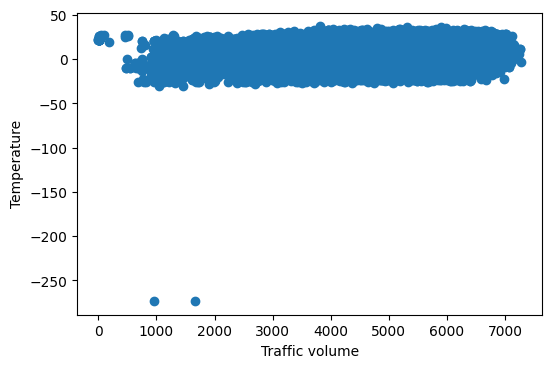

In [32]:
plt.scatter(daytime_list['traffic_volume'], daytime_list['temp'])
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')
plt.show()

There appears to be 2 outliners. Lets remove them so we can continue.           

In [33]:
outliner_temps_bool = (daytime_list['temp'] < -50)
outliner_temps = daytime_list[outliner_temps_bool]

outliner_temps

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
11950,None,-273.15,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962,2,6,7
11951,None,-273.15,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670,2,6,8


In [34]:
for remove in outliner_temps.index:
    daytime_list.drop([remove], inplace = True)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



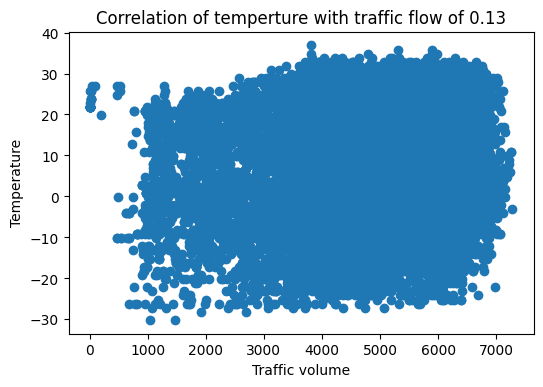

In [35]:
plt.scatter(daytime_list['traffic_volume'], daytime_list['temp'])
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')
plt.title('Correlation of temperture with traffic flow of 0.13')
plt.show()

The 2 outliners have been removed and we see the spread of the correlation of temp to traffic volume. The correlation is only slight and is nicely illustrated here.

There is not really any reliable weather indicators for traffic volumne

### Examining weather_main and weather description

In [54]:
daytime_list.loc[0:10, ['weather_main', 'weather_description']]

,weather_main,weather_description
0,Clouds,scattered clouds
1,Clouds,broken clouds
2,Clouds,overcast clouds
3,Clouds,overcast clouds
4,Clouds,broken clouds
5,Clear,sky is clear
6,Clear,sky is clear
7,Clear,sky is clear
8,Clouds,few clouds
9,Clouds,few clouds


In [55]:
by_weather_main = daytime_list.groupby('weather_main').mean()
by_weather_description = daytime_list.groupby('weather_description').mean()

by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,10.277551,0.000000,0.000000,1.670846,4779.622257,6.492163,3.137931,12.405956
Clouds,9.291852,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,10.816025,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,3.971547,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,1.690528,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626
Mist,5.782125,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,11.078288
Rain,13.451901,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,12.642379
Smoke,18.766667,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,13.166667
Snow,-5.643122,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,12.153370


Is there a heavy traffic indicator here?

In [60]:
by_weather_main.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'month',
       'dayofweek', 'hour'],
      dtype='object')

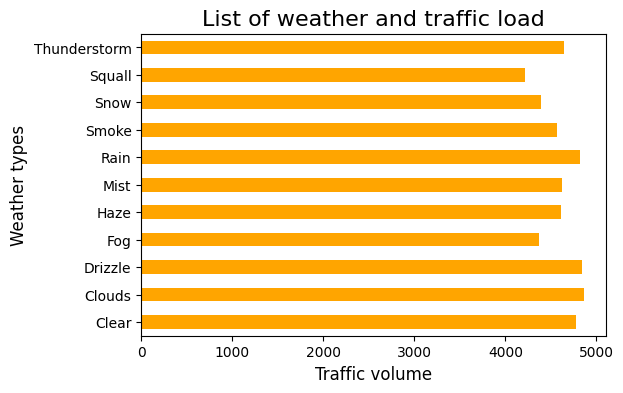

In [70]:
by_weather_main['traffic_volume'].plot.barh(color='orange')
plt.title('List of weather and traffic load', fontsize=16)
plt.xlabel('Traffic volume', fontsize=12)
plt.ylabel('Weather types', fontsize=12)
plt.show()

No obvious indicators of weather and traffic

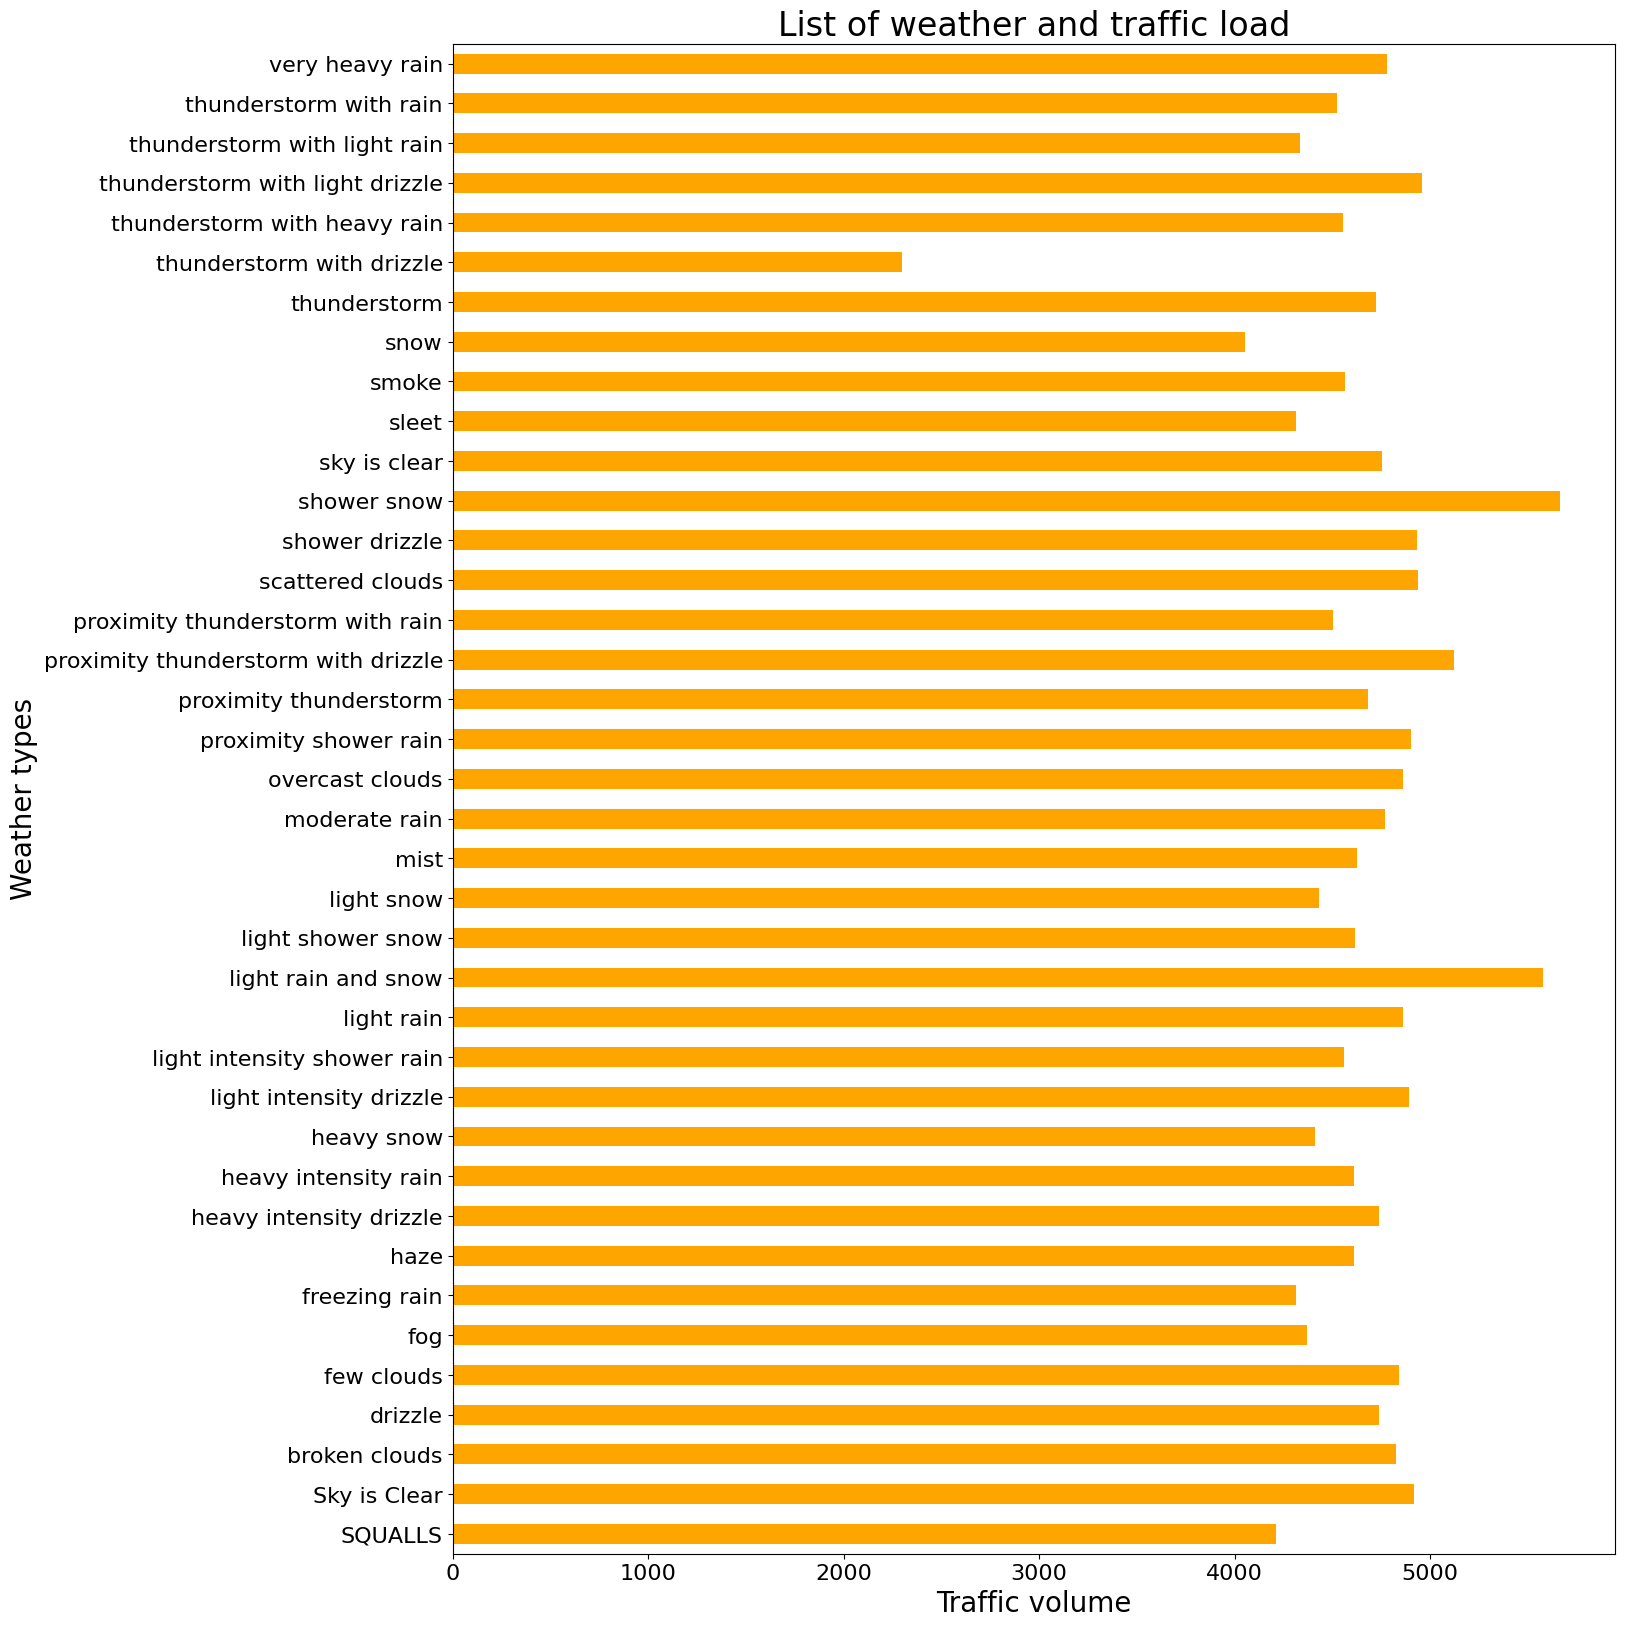

In [78]:
by_weather_description['traffic_volume'].plot.barh(figsize=(15,20), color='orange', fontsize=16)
plt.title('List of weather and traffic load', fontsize=24)
plt.xlabel('Traffic volume', fontsize=20)
plt.ylabel('Weather types', fontsize=20)
plt.show()

It appears that light "rain and snow" & "shower snow" categories lead to heavy traffic.

## 5. Summary

This project has analysed and represented traffic on the highway I-94. Here we could analyse specific time points the traffic loads were at their heaviest and lightest. We also investigated and illustrated with graphs if there were any indicators for specific traffic patterns to help better predict traffic for the future and where efforts could be possibly made to improve the roads system.            

Thank you for reading!

Cheers,             
Bill Close